In [1]:
import numpy as np
from sklearn import datasets
from sklearn.semi_supervised import LabelPropagation

In [2]:
label_prop_model = LabelPropagation()
iris = datasets.load_iris()
rng = np.random.RandomState(42)

In [3]:
random_unlabeled_points = rng.rand(len(iris.target)) < 0.3

In [4]:
labels = np.copy(iris.target)
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [5]:
labels[random_unlabeled_points] = -1
labels

array([ 0,  0,  0,  0, -1, -1, -1,  0,  0,  0, -1,  0,  0, -1, -1, -1,  0,
        0,  0, -1,  0, -1, -1,  0,  0,  0, -1,  0,  0, -1,  0, -1, -1,  0,
        0,  0,  0, -1,  0,  0, -1,  0, -1,  0, -1,  0,  0,  0,  0, -1,  1,
        1,  1,  1,  1,  1, -1, -1, -1,  1,  1, -1,  1,  1, -1,  1, -1,  1,
       -1,  1,  1, -1, -1,  1,  1,  1,  1, -1,  1, -1,  1,  1,  1, -1,  1,
        1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1, -1, -1, -1,  2,
        2,  2,  2, -1,  2,  2, -1, -1, -1, -1,  2,  2,  2,  2,  2, -1,  2,
        2,  2,  2,  2, -1, -1,  2,  2,  2, -1,  2,  2, -1, -1,  2,  2,  2,
        2,  2,  2,  2,  2, -1,  2,  2, -1, -1,  2,  2, -1, -1])

In [6]:
label_prop_model.fit(iris.data, labels)
preds = label_prop_model.predict(iris['data'])
preds

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

## Label Propagation w/ NetworkX

In [7]:
import networkx as nx
import matplotlib.pyplot as plt

In [8]:
G = nx.Graph()

In [9]:
node_defs = [
    ('A', {"label": "green", "weight": 1}),
    ('B', {"label": "green", "weight": 1}),
    ('C', {"label": None, "weight": 1}),
    ('D', {"label": "green", "weight": 0.2}),
    ('E', {"label": "green", "weight": 0.1}),
    ('F', {"label": "green", "weight": 0.9}),
    ('G', {"label": "red", "weight": 0.2}),
    ('H', {"label": "red", "weight": 0.9}),
    ('X', {"label": None, "weight": 1}),
    ('Y', {"label": None, "weight": 1})]

edge_defs = [('A','X'), 
             ('B','X'), 
             ('X','Y'), 
             ('C','X'), 
             ('C','Y'), 
             ('D','Y'),
             ('E','B'),
             ('F','B'),
             ('G','Y'),
             ('H','Y')]
G.add_nodes_from(node_defs)
G.add_edges_from(edge_defs)

In [10]:
available_colors = {
    "red":    "#FF0000",
    "blue":   "#0000FF",
    "green":  "#008000",
    "yellow": "#FFFF00",
    "fucsia": "#FF00FF",
    None: "#D3D3D3" ## Light Gray
}

In [11]:
def get_graph_color_map(graph: nx.Graph) -> nx.Graph:
    for n in graph:
        graph.nodes[n]['current_color']=set_transparency(graph.nodes[n]['weight'], available_colors[graph.nodes[n]['label']])
    return graph

In [12]:
def set_transparency(percent_transp: float, color: str) -> str:
    base_hex = 255
    transparency = str(format(round(percent_transp*base_hex), 'x'))
    trans_color = color + transparency
    return trans_color

In [13]:
colored_graph = get_graph_color_map(G)

In [14]:
color_map = [colored_graph.nodes[x]['current_color'] for x in list(colored_graph.nodes)]

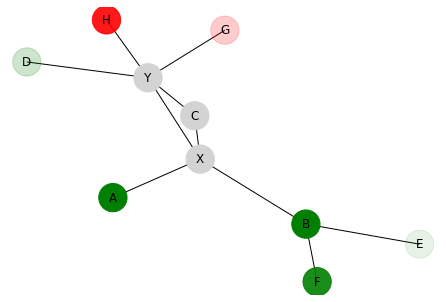

In [15]:
nx.draw(colored_graph, node_color=color_map, with_labels=True, node_size = 800)
plt.show()

In [16]:
node_list = [x[0] for x in node_defs]
print(f"Node list {node_list}")
A = nx.adjacency_matrix(colored_graph, nodelist=node_list).toarray()
A

Node list ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'X', 'Y']


array([[0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1, 1, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [1, 1, 1, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 1, 1, 0, 0, 1, 1, 1, 0]])

## Label Propagation Algorithms
- Propagate Labels through high density areas defined by unlabeled data
- Weights $\rightarrow$ The closer nodes are in Euclidean space, the larger $w_{ij}$

$$
w_{ij} = \exp (-\frac{d_{ij}^2}{\sigma^2}) =  \exp (-\frac{\sum_{d=1}^D (x_{i}^D-x_{j}^D)^2}{\sigma^2})
$$
- All nodes have soft labels $\rightarrow$ distribution over labels
- Labels propagate through edges $\rightarrow$ larger weights allow labels to propagate more easily
- Transition probability
$$
T_{ij} = P(i\rightarrow j) = \frac{w_{ij}}{\sum_{k=1}^{l+u}w_{kj}}
$$

- The Algorithm
    1. All nodes propagate one step $Y \leftarrow TY$
    2. Row normalize Y to maintain class probability interpretation
    3. Clamp the labeled data. Repeat from step 2 until Y converges
- Smoothing transition probabilities  
$\tilde{T} = \epsilon \textit{U} + (1-\epsilon T)$ 

## Sources
1. https://medium.com/@bagelbigcheese/a0cf577ce9ff
2. https://medium.com/@graphml/introduction-to-label-propagation-with-networkx-part-1-abcbe954a2e8